# Исследование устойчивости разностных схем

Дана дифференциальная задача для уравнения переноса
	\begin{equation}
		\begin{dcases}
			\dfrac{\partial u}{\partial t} + a \dfrac{\partial u}{\partial x} = 0,\ 0 < x < \infty,\ t>0,\ a>0\\
		u(x,0) = u_0(x),\ x \geq 0\\
        u(0,t) = \mu_0(t),\ t \geq 0
		\end{dcases}
	\end{equation}
	где
    
- $a=15$;

- $u_0(x) = 3x^2$;

- $\mu_0(t) = 10t^2$.

Сразу же проверим условия согласования для корректной постановки задачи:
$$u_0(0) = 0 = \mu_0(0).$$

Определим входные данные компьютерно

In [1]:
a = 15

def u_0(x):
    return 3*x**2

def mu_0(t):
    return 10*t**2

## Построение разностной схемы, погрешность аппроксимации

Для поставленной дифференциальной задачи известно точное решение
$$u(x,t) = \begin{cases}
u_0(x-at),\ t \leq \dfrac x a,\\
\mu_0\left(t - \dfrac x a\right),\ t \geq \dfrac x a.
\end{cases}$$
Подставляя известные функции, получим точное решение задачи вида
$$u(x,t) = \begin{cases}
3(x-15t)^2,\ t \leq \dfrac x {15},\\
10\left(t - \dfrac x {15}\right)^2,\ t \geq \dfrac x {15}.
\end{cases}$$
Определим компьютерно функцию, соответствующую точному решению.

In [2]:
def u(x, t):
    result = np.zeros_like(x)
    condition = a * t < x 
    result[condition] = u_0(x[condition] - a * t)
    result[~condition] = mu_0(t - x[~condition] / a)
    return result

Пусть задана равномерная сетка узлов
$$\omega_{h\tau} = \omega_h \times \omega_\tau,$$
где
$$\omega_h = \left\{x_k = kh,\ k = 0,1,\ldots, h>0\right\},\ \omega_\tau = \left\{t_j = j\tau,\ j=0,1,\ldots, \ \tau > 0\right\}.$$
Зададим компьютерно сетки узлов. На вход эта функция принимает правую границу для сетки узлов и число разбиений отрезка, а возвращает шаг и узлы сетки.

In [3]:
import numpy as np

def generate_grid(right_border, num_splits):
    step = right_border / num_splits
    grid = np.linspace(0, right_border, num_splits+1)
    return step, grid

По условию также задан следующий шаблон
$$\text{Ш}(x,t) = \{(x-h,t),\ (x,t),\ (x,t-\tau)\}.$$
$$
\includegraphics[scale=0.5]{img_1}
$$
Используя предложенный шаблон на заданной сетке узлов построим разностную схему в безиндексной форме, заменяя дифференциальные производные разностными аналогами
\begin{equation}
    \begin{cases}
        y_{\overline t} + ay_{\overline x} = 0,\ (x,t) \in \omega_{h\tau},\\
    y(x,0) = u_0(x),\ x \in \omega_h,\\
    y(0,t) = \mu_0(t),\ t \in \omega_\tau.
    \end{cases}
\end{equation}
Разностная схема также может быть записана в индексной форме в виде
\begin{equation}
    \begin{dcases}
        \dfrac{y_k^{j} - y_k^{j-1}}{\tau} + a \dfrac{y_{k}^j - y_{k-1}^j}{h}=0,\  k=1,2,\ldots, j = 1,2\ldots,\\
        y_k^0 = u_0(x_k),\ k = 0, 1,\ldots,\\
        y_0^j = \mu_0(t_j),\ j = 0, 1,\ldots,\\
    \end{dcases}
\end{equation}
Нужно вычислить погрешность аппроксимации разностной схемы. Начальное и граничное условия аппроксимируются точно, так что погрешность аппроксимации разностной схемы определяется только погрешностью аппроксимации дифференциального уравнения. Поэтому для любой точки $(x,t) \in \omega_{h\tau}$ погрешность аппроксимации будет равна
$$\Psi(x,t) = u_{\overline t} + au_{\overline x} = \dfrac{\partial u}{\partial t} - \dfrac{\tau}{2}\cdot \dfrac{\partial^2 u}{\partial^2 t}  + O(\tau^2) + \dfrac{\partial u}{\partial x} - \dfrac{h}{2}\cdot \dfrac{\partial^2 u}{\partial^2 x}  + O(h^2) = O(h+\tau),$$ то есть данная разностная схема обладает первым порядком аппроксимации по $x$ и первым порядком аппроксимации по $t$.

## Исследование устойчивости разностной схемы спектральным методом

Исследование устойчивости по спектральному методу предусматривает подстановку следующего выражения в разностное уравнение
$$y_k^j = q^j e^{ik\varphi},\ \varphi \in (0, 2\pi).$$
Итак, подставляя это выражение в разностное уравнение схемы (3), получим
$$\dfrac{q^{j} e^{ik\varphi} - q^{j-1} e^{ik\varphi}}{\tau} + a \dfrac{q^j e^{ik\varphi} - q^j e^{i(k-1)\varphi}}{h}=0.$$
Сокращая общие множители, получим
$$\dfrac{1 - q^{-1}}{\tau} + a \dfrac{1 - e^{-i\varphi}}{h} = 0.$$
Домножим на $\tau$, тогда
$$1 - q^{-1} + \gamma (1 - e^{-i\varphi}) = 0,\ \gamma = \dfrac {a\tau}{h}.$$
Выразим отсюда $q$
$$q = \dfrac{1}{1+\gamma(1-e^{-i\varphi})} = \dfrac{1}{1+\gamma(1-\cos \varphi + i \sin\varphi)}.$$
Далее по спектральному методу для устойчивости необходимо выполнение условия $|q|^2 \leqslant 1$. Рассмотрим это условие
$$
    |q|^2 = \dfrac{1}{(1+\gamma(1-\cos \varphi))^2 + (\gamma \sin \varphi)^2}\leqslant 1.
$$
Тогда отсюда необходимо выполнение условия
$$1 \leqslant (1+\gamma(1-\cos \varphi))^2 + (\gamma \sin \varphi)^2 = 1 + \gamma^2 + \gamma^2\cos^2 \varphi + 2 \gamma - 2 \gamma^2 \cos \varphi - 2 \gamma \cos \varphi + \gamma^2 \sin^2 \varphi.$$
Тогда
$$2\gamma(\gamma+1)(1-\cos \varphi) \geqslant 0.$$
Отсюда получаем
$$\left[ 
      \begin{gathered} 
        \gamma \leqslant -1, \\ 
        \gamma \geqslant 0. \\ 
      \end{gathered} 
\right.$$
Но в условиях того, что по постановке задачи $a > 0$, нам подходит условие
$$\gamma = \dfrac{a\tau}{h} \geqslant 0,$$
которое верно при любых $h$, $\tau$, а значит схема будет устойчива прил любых шагах $h$ и $\tau$.

## Исследование устойчивости разностной схемы с помощью принципа максимума

Следуя принципу максимума, в качестве точки для исследования устойчивости возьмем точку $(x_k, t_j)$. Таким образом, мы можем переписать аппроксимацию основного уравнения переноса
$$\left(\dfrac{1}{\tau}+\dfrac a h \right) y_k^{j} = \dfrac{1}{\tau}y_k^{j-1} + \dfrac{a}{h}y_{k-1}^j.$$
Можем записать коэффициенты, которые требуются для проверки условий устойчивости
$$A(x) = \dfrac{1}{\tau}+\dfrac a h >0,\ B_1 = \dfrac 1 \tau>0,\ B_2 = \dfrac a h>0,$$
$$D(x) = A(x) - (B_1 + B_2) \equiv 0,\ F(x)\equiv 0.$$
Из положительности коэффициентов мы получаем два условия $$\dfrac{1}{\tau}+\dfrac a h > 0,\ \dfrac{a}{h} > 0,$$
а тогда
$$\dfrac{a\tau}{h} > -1,\ a > 0.$$
Таким образом, единственное условие, которое должно выполняться -- это $a > 0$, а оно выполняется по постановке задачи. Следовательно, разностная схема будет устойчива при любых шагах $h$ и $\tau$.

## Реализация разностной схемы

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Для реализации разностной схемы представим ее в виде
$$
    \begin{dcases}
        y_k^{j}= \dfrac{y_k^{j-1} + \gamma y_{k-1}^j}{1+\gamma},\  k=1,2,\ldots, j = 1,2\ldots,\\
        y_k^0 = u_0(x_k),\ k = 0, 1,\ldots,\\
        y_0^j = \mu_0(t_j),\ j = 0, 1,\ldots,\\
    \end{dcases}\ \gamma = \dfrac{a\tau}{h}.
$$
При реализации сначала строятся значения из начального и граничного условий. То есть мы задаем $y_k^j$ при $j = 0$, $\forall k$, а затем при $k=0$, $\forall j$. Остальные значения функций можно вычислять по формуле выше.

In [5]:
def diff_scheme_solve(x, t, h, tau, u_0, mu_0, a):
    gamma = a * tau / h

    y = np.zeros((len(x), len(t)))

    for k in range(len(x)):
        y[k, 0] = u_0(x[k])

    for j in range(len(t)):
        y[0, j] = mu_0(t[j])

    for j in range(1, len(t)):
        for k in range(1, len(x)):
            y[k, j] = (y[k, j-1] + gamma * y[k-1, j]) / (1+gamma)

    return y

Теперь сгенерируем сетку с $\tau < h$.

In [6]:
h, x_grid = generate_grid(1, 5)
tau, t_grid = generate_grid(0.1, 3)

In [7]:
h

0.2

In [8]:
tau

0.03333333333333333

Получим приближенное решение из разностной схемы

In [9]:
y = diff_scheme_solve(x_grid, t_grid, h, tau, u_0, mu_0, a)

Выведем двумерный график

In [10]:
def plot_2D():
    for j, t in enumerate(t_grid):
        plt.figure(figsize=(10, 6))
        plt.plot(x_grid[:], y[:, j], label='численное решение')
        plt.plot(x_grid, u(x_grid, t), label='точное решение')
        plt.grid(True)
        plt.xlabel('x')
        plt.ylabel('u(x,t)')
        plt.title('Приближение в момент t' + str(j) + '=' + str(round(t, 3)))
        plt.legend()
        plt.show()

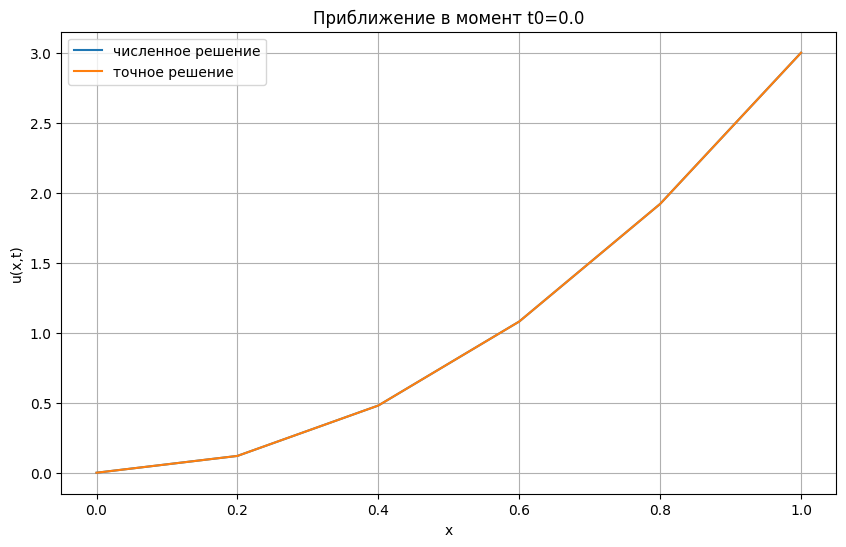

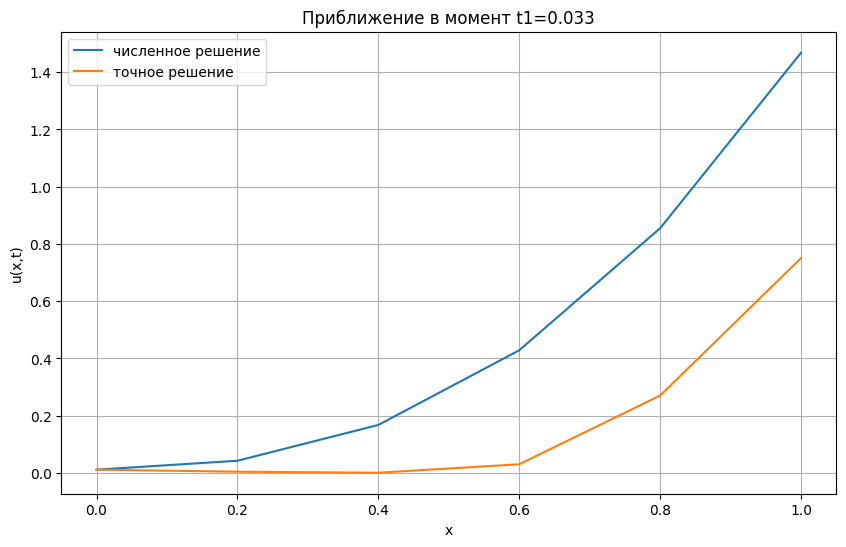

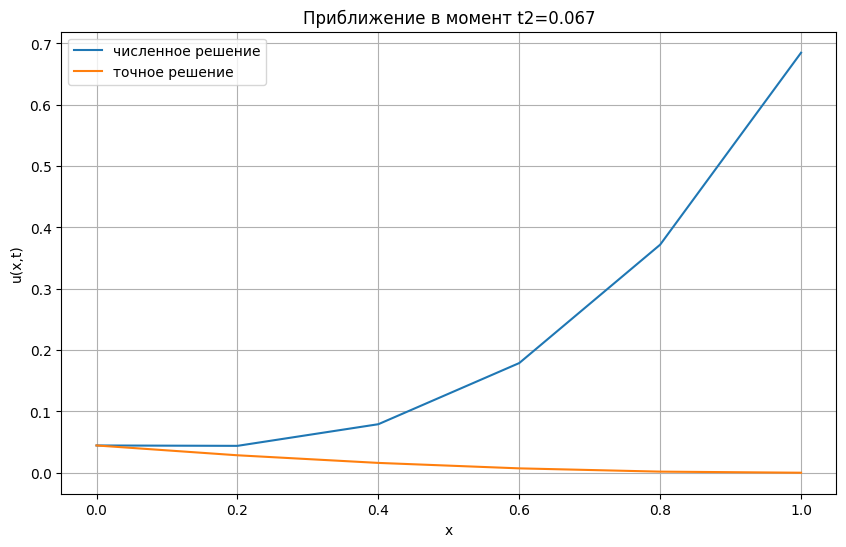

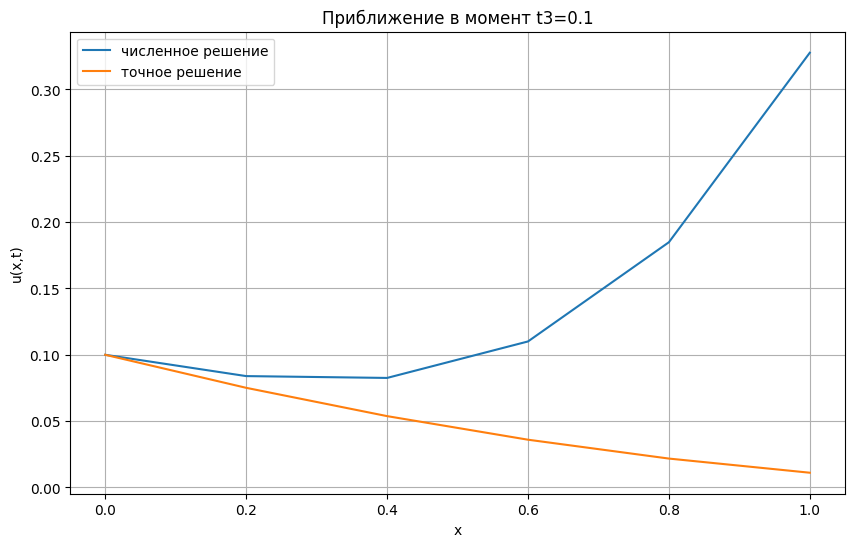

In [11]:
plot_2D()

Выведем трехмерные графики точного и приближенного решений

In [12]:
def plot_exact3D():    
    X, T = np.meshgrid(x_grid, t_grid)
    U = np.zeros_like(X)
    for i in range(T.shape[0]):
        U[i, :] = u(X[i, :], T[i, 0])
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X, T, U, cmap='viridis', edgecolor='k')
    
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u(x, t)')
    
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    
    plt.title('График точного решения')
    plt.show()

def plot_approx3D():
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    X, T = np.meshgrid(x_grid, t_grid)
    
    Y = y.T
    
    surf = ax.plot_surface(X, T, Y, cmap='viridis', edgecolor='k')
    
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u(x, t)')
    
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    
    plt.title('График приближенного решения')
    plt.show()

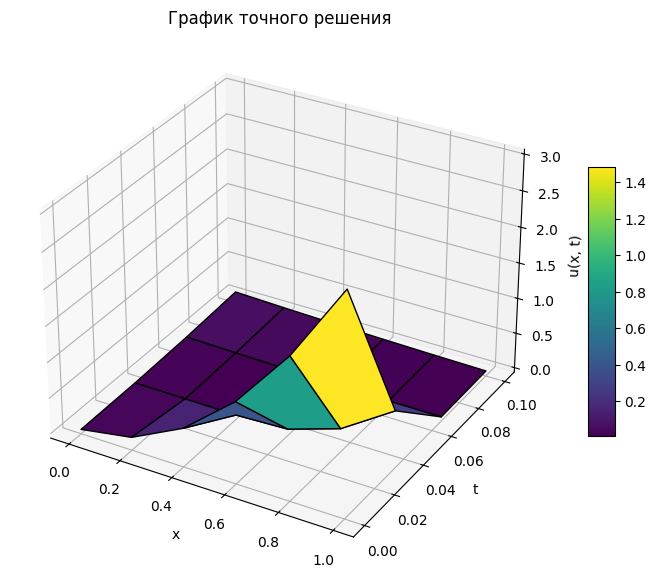

In [13]:
plot_exact3D()

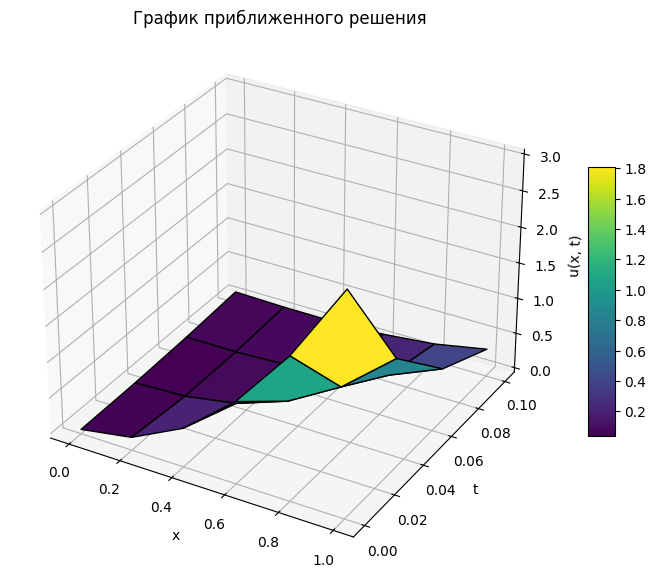

In [14]:
plot_approx3D()

Как можно видеть, по поведению приближенного решения мы можем утверждать, что полученная разностная схема действительно устойчива.

Рассмотрим теперь случай $h < \tau$.

In [15]:
h, x_grid = generate_grid(0.01, 5)
tau, t_grid = generate_grid(0.1, 3)

In [16]:
h

0.002

In [17]:
tau

0.03333333333333333

In [18]:
y = diff_scheme_solve(x_grid, t_grid, h, tau, u_0, mu_0, a)

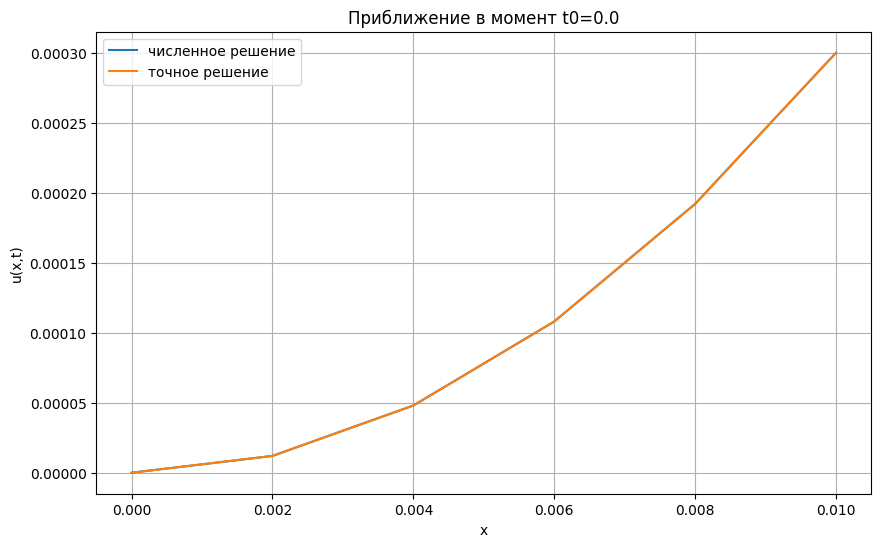

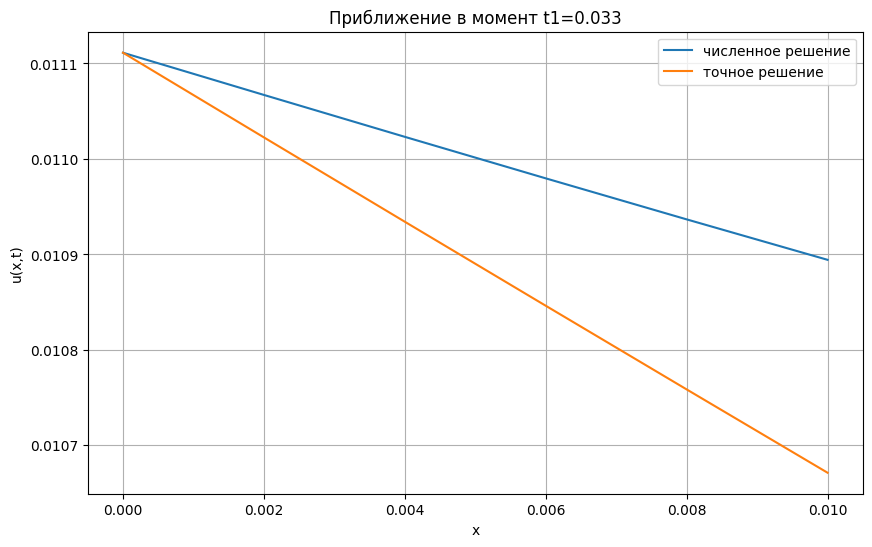

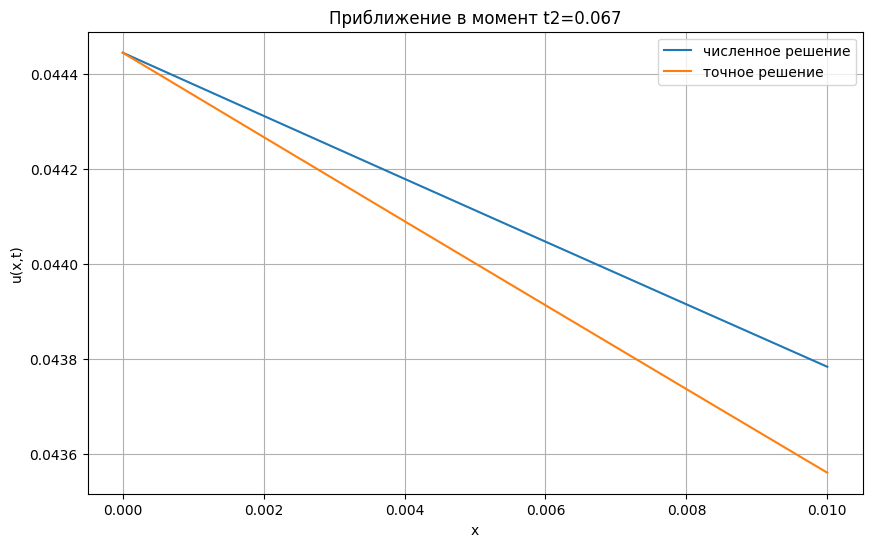

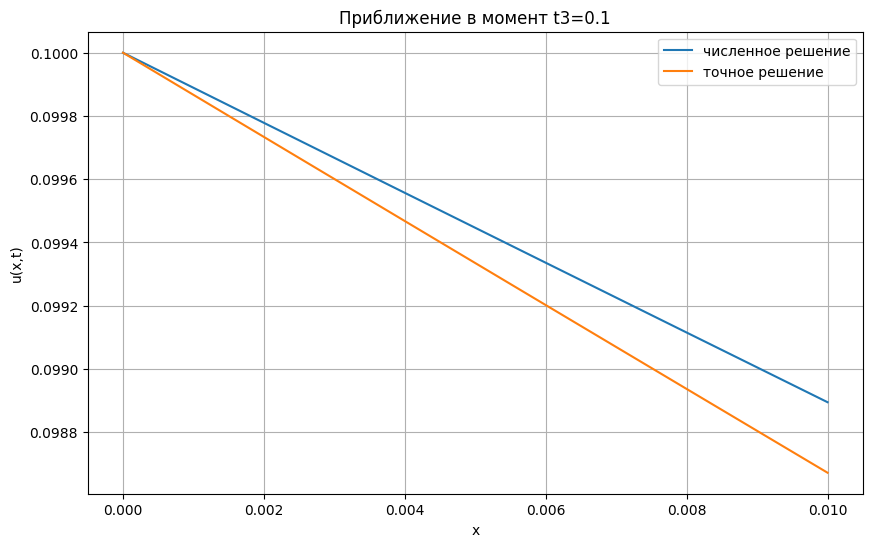

In [19]:
plot_2D()

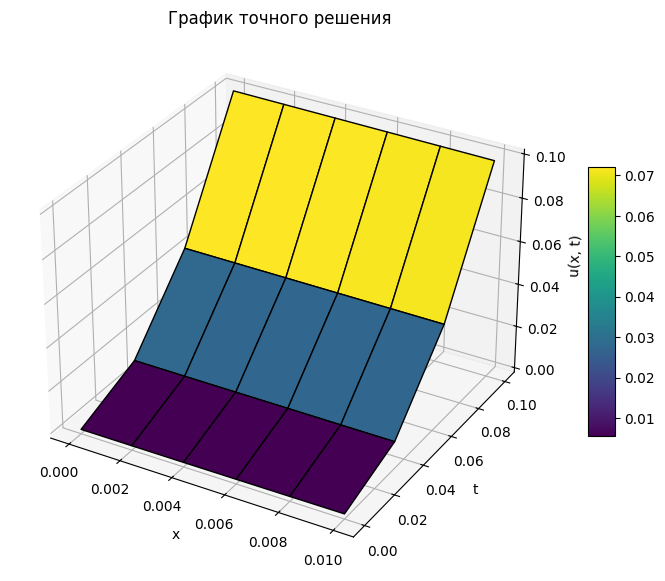

In [20]:
plot_exact3D()

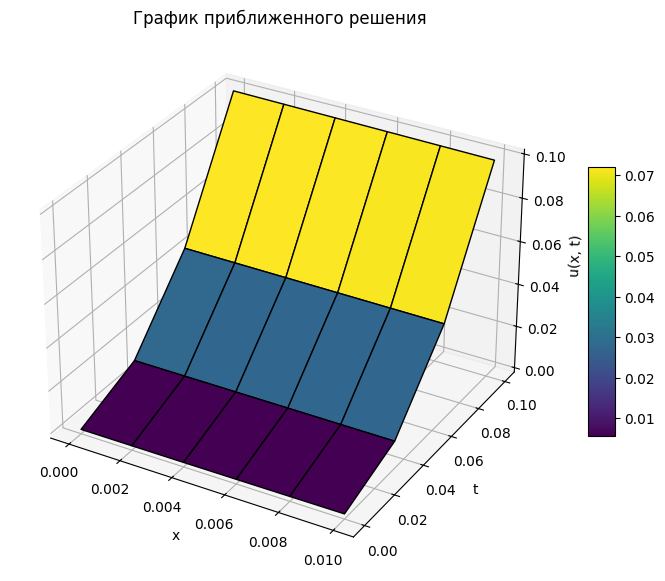

In [21]:
plot_approx3D()

В данном в случае, как можно видеть, разностная схема также получается устойчивой.

Таким образом, действительно при любых $h$ и $\tau$ мы получаем устойчивую разностную схему, что соответствует нашим теоретическим ожиданиям.